In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv(r"D:\Board infinity\ML module\projects\ML Project1_BMP (1)\bank-marketing.csv")

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Read in the file and get basic information about the data, including numerical summaries.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


# - Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [5]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How  different are the mean and the median values?

In [6]:
print("mean of pdays:\n",df['pdays'].mean())
print("mode of pdays:\n",df['pdays'].mode())
print("meadian of pdays:\n",df['pdays'].median())

mean of pdays:
 40.19782796222158
mode of pdays:
 0   -1
dtype: int64
meadian of pdays:
 -1.0


In [7]:
df['pdays'].isnull().sum()

0

# - Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [8]:
df.head(2)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


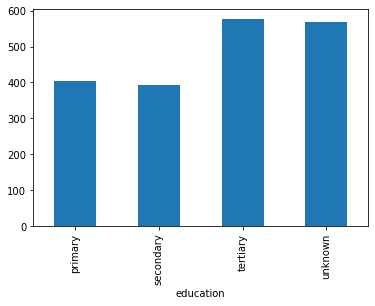

In [9]:
x=df.groupby('education')['balance'].median().plot(kind='bar')

# - Make a box plot for pdays. Do you see any outliers?

AxesSubplot(0.125,0.125;0.775x0.755)


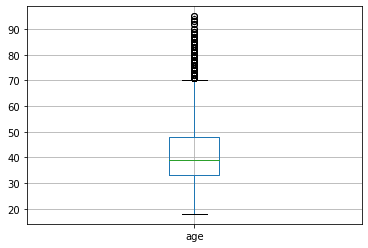

AxesSubplot(0.125,0.125;0.775x0.755)


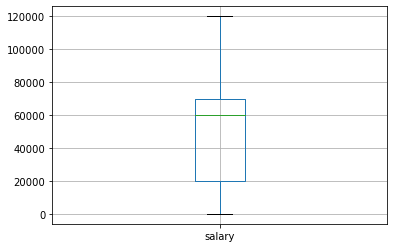

AxesSubplot(0.125,0.125;0.775x0.755)


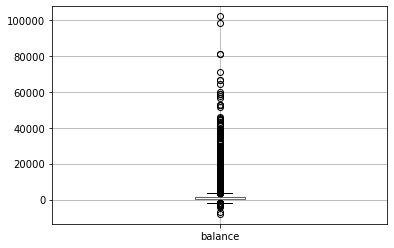

AxesSubplot(0.125,0.125;0.775x0.755)


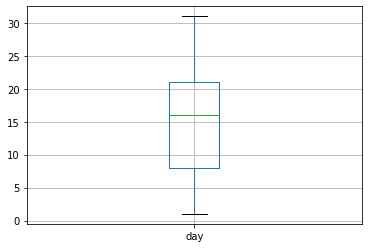

AxesSubplot(0.125,0.125;0.775x0.755)


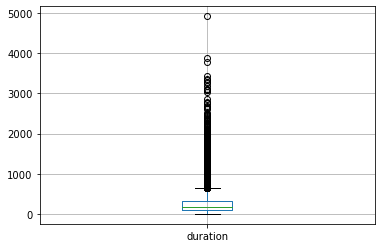

AxesSubplot(0.125,0.125;0.775x0.755)


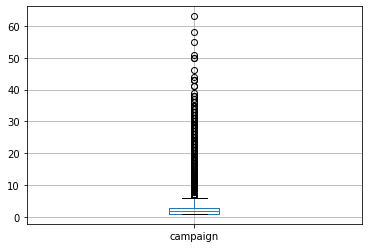

AxesSubplot(0.125,0.125;0.775x0.755)


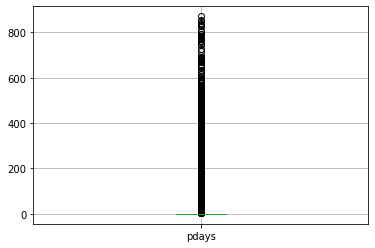

AxesSubplot(0.125,0.125;0.775x0.755)


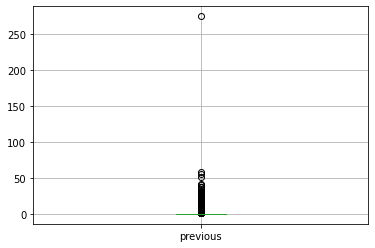

In [10]:
outliers=[]
for i in df.columns:
    if df[i].dtypes=='int64':
        outliers.append(i)
        print(df.boxplot(i))
        plt.show()
        

# The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”

In [11]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
labelencoder = LabelEncoder()

In [13]:
 df1=df

In [14]:
le = preprocessing.LabelEncoder()

In [15]:
df1=df1.apply(LabelEncoder().fit_transform)


# - Convert the response variable to a convenient form

In [16]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,40,4,9,1,2,1,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,7,2,1,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,10,1,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,4,1,3,0,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,0,2,3,0,0,917,0,0,2,4,8,198,0,0,0,3,0


# - Make suitable plots for associations with numerical features and categorical features

In [17]:
numerical=[]
catogrical=[]
for i in df1.columns:
    if df1[i].dtypes=='int64':
        numerical.append(i)
    else:
        catogrical.append(i)

In [18]:
print(numerical)
print(catogrical)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']


plots for numericals

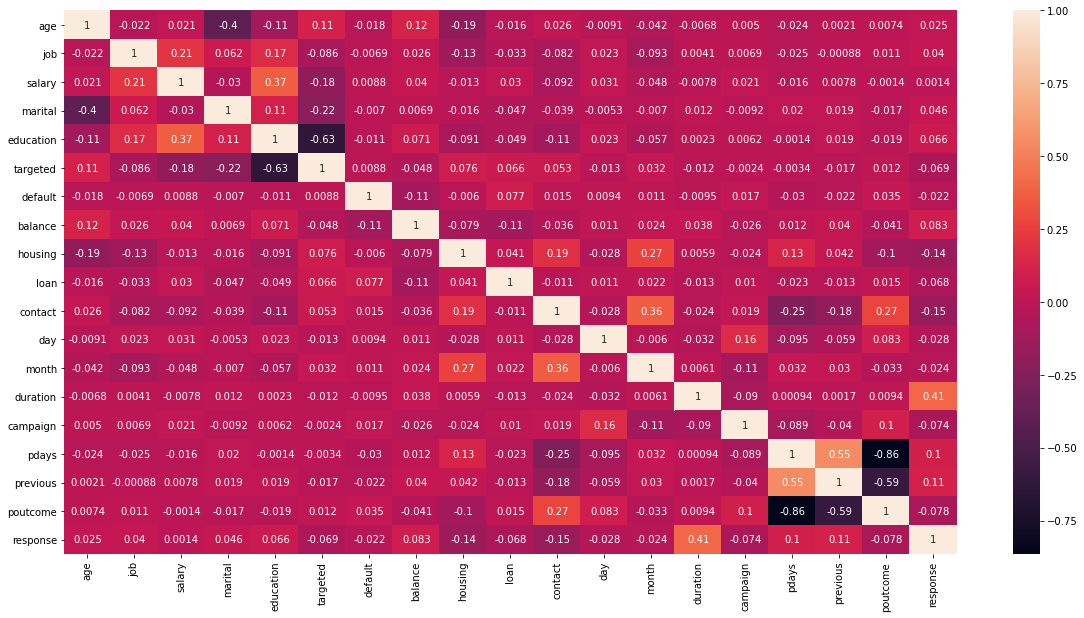

In [19]:
plt.subplots(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [20]:
x=[]
for i in df1.columns:
    if i!='response':
        x.append(i)

In [21]:

X = df1[x]
y = df1.response

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Make a predictive model using logistic regression

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)

In [25]:
model=clf.fit(X_train,y_train)

In [26]:
response_predict=model.predict(X_test)

In [27]:
response_predict

array([0, 1, 0, ..., 0, 0, 1])

In [28]:
confusion_matrix(y_test,response_predict)

array([[9648,  330],
       [ 783,  542]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, response_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9978
           1       0.62      0.41      0.49      1325

    accuracy                           0.90     11303
   macro avg       0.77      0.69      0.72     11303
weighted avg       0.89      0.90      0.89     11303



In [33]:
y_pred = clf.predict_proba(X_test)[:,1]

In [34]:
y_pred

array([0.04, 0.7 , 0.  , ..., 0.  , 0.  , 0.64])

In [35]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred))

roc_auc_score for Logistic Regression:  0.9194855852687233


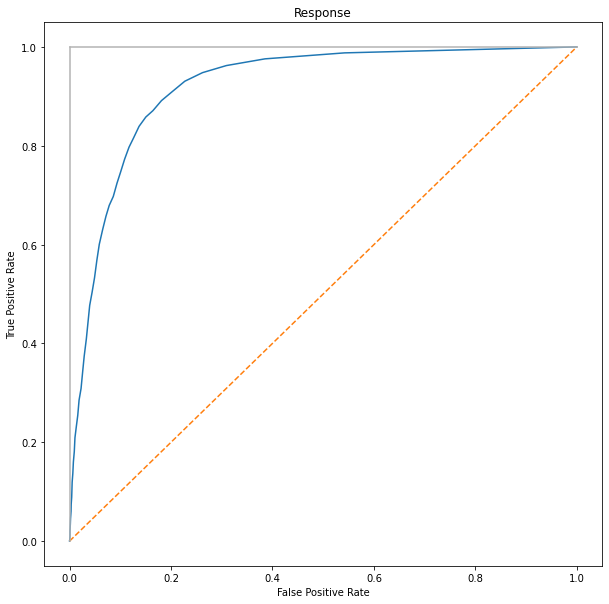

In [36]:
plt.subplots(1, figsize=(10,10))
plt.title('Response')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# random forest model

In [37]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.1341219145359639
0.06628035034946474
0.25744970450452015


# - Estimate the model performance using k fold cross validation

In [38]:
from sklearn.model_selection import cross_val_score
all_output = cross_val_score(estimator =model, X = X_train, y = y_train, cv = 5)

In [39]:
all_output

array([0.90371572, 0.90238868, 0.90401062, 0.90473382, 0.90635599])

In [40]:
print('Overall Accuracy of this Model:', (all_output.mean()*100))

Overall Accuracy of this Model: 90.4240964016802


# - What is the precision, recall, accuracy of your model?


In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)

In [42]:
model = clf.fit(X_train,y_train)

In [43]:
y_pred= model.predict(X_test)

In [44]:
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [45]:

from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9023268158895869


In [46]:
print('Error Metrics')
em = metrics.classification_report(y_test, y_pred)
print(em)

Error Metrics
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9978
           1       0.63      0.41      0.49      1325

    accuracy                           0.90     11303
   macro avg       0.78      0.69      0.72     11303
weighted avg       0.89      0.90      0.89     11303



In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
all_output = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 5)

In [49]:
all_output

array([0.90165143, 0.90253613, 0.90371572, 0.90679841, 0.9053237 ])

In [50]:
print('over all result:',all_output.mean()*100)

over all result: 90.40050758509551
